Hi, in this project, I wanted to find out the relationship between the year in which an artist's work was acquired and their age. Whose works in this museum were acquired in the artist's twilight years or even after their death? Whose works were acquired at a young age?
Do artists become more experienced as they age and their work is more likely to be appreciated and acquired?

The method I used is using the artworks' acquisition Year to minus the artists' Birth Year.

In [3]:
import pandas as pd

In [4]:
pd.options.display.max_rows = 100

In [5]:
artist = pd.read_csv('C:/Users/pc/Desktop/artist_data.csv', delimiter=",", encoding='utf-8').rename(columns={'name':'artist'})
artist

,id,artist,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...
4,622,"Abrahams, Ivor",Male,born 1935,1935.0,NaN,"Wigan, United Kingdom",NaN,http://www.tate.org.uk/art/artists/ivor-abraha...
...,...,...,...,...,...,...,...,...,...
3527,12542,"Zorio, Gilberto",Male,born 1944,1944.0,NaN,"Andorno Micca, Italia",NaN,http://www.tate.org.uk/art/artists/gilberto-zo...
3528,2186,"Zox, Larry",Male,born 1936,1936.0,NaN,"Des Moines, United States",NaN,http://www.tate.org.uk/art/artists/larry-zox-2186
3529,621,"Zuccarelli, Francesco",Male,1702–1788,1702.0,1788.0,Italia,Firenze,http://www.tate.org.uk/art/artists/francesco-z...
3530,2187,"Zuloaga, Ignacio",Male,1870–1945,1870.0,1945.0,España,España,http://www.tate.org.uk/art/artists/ignacio-zul...


HERE I renamed the column 'name' to 'artist' in order to find a same join name with the other csv.

In [6]:
artwork = pd.read_csv('C:/Users/pc/Desktop/artwork_data.csv', low_memory=False, delimiter=',',encoding='utf-8')
artwork

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922.0,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,1922.0,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69196,122960,T13865,"P-Orridge, Genesis",artist,16646,Larvae (from Tampax Romana),1975,"Perspex, Wood, hairpiece, tampon and human blood",Transferred from Tate Archive 2012,1975,2013.0,object: 305 x 305 x 135 mm,305,305,135.0,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/p-orridge-...
69197,122961,T13866,"P-Orridge, Genesis",artist,16646,Living Womb (from Tampax Romana),1976,"Wood, Perspex, plastic, photograph on paper, t...",Transferred from Tate Archive 2012,1976,2013.0,object: 305 x 305 x 135 mm,305,305,135.0,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/p-orridge-...
69198,121181,T13867,"Hatoum, Mona",artist,2365,Present Tense,1996,Soap and glass beads,Presented by Tate Members 2013,1996,2013.0,displayed: 45 x 2410 x 2990 mm,45,2410,2990.0,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/hatoum-pre...
69199,112306,T13868,"Creed, Martin",artist,2760,Work No. 227: The lights going on and off,2000,Gallery lighting,"Purchased with funds provided by Tate Members,...",2000,2013.0,Overall display dimensions variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/creed-work...


Then merge them together.

In [7]:
merged = pd.merge(artist, artwork, on='artist')
merged

,id_x,artist,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url_x,id_y,...,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url_y
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...,102939,...,2009.0,Overall display dimensions variable,NaN,NaN,NaN,NaN,NaN,© Magdalena Abakanowicz,http://www.tate.org.uk/art/images/work/T/T12/T...,http://www.tate.org.uk/art/artworks/abakanowic...
1,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...,102938,...,2009.0,Display dimensions: 4050 x 3820 x 4000 mm,NaN,NaN,NaN,NaN,NaN,© Magdalena Abakanowicz,http://www.tate.org.uk/art/images/work/T/T12/T...,http://www.tate.org.uk/art/artworks/abakanowic...
2,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...,103642,...,2009.0,Display dimensions: 4010 x 2900 x 3700 mm,NaN,NaN,NaN,NaN,NaN,© Magdalena Abakanowicz,http://www.tate.org.uk/art/images/work/T/T12/T...,http://www.tate.org.uk/art/artworks/abakanowic...
3,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...,103644,...,2009.0,"object, each: 660 x 580 x 680 mm",NaN,NaN,NaN,NaN,NaN,© Magdalena Abakanowicz,http://www.tate.org.uk/art/images/work/T/T12/T...,http://www.tate.org.uk/art/artworks/abakanowic...
4,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...,311,...,1924.0,support: 251 x 295 mm,251,295,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/N/N03/N...,http://www.tate.org.uk/art/artworks/abbey-illu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69308,12542,"Zorio, Gilberto",Male,born 1944,1944.0,NaN,"Andorno Micca, Italia",NaN,http://www.tate.org.uk/art/artists/gilberto-zo...,103399,...,2009.0,object: 125 x 1113 x 190 mm image: 340 x 287 m...,125,1113,190.0,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/zorio-hatr...
69309,2186,"Zox, Larry",Male,born 1936,1936.0,NaN,"Des Moines, United States",NaN,http://www.tate.org.uk/art/artists/larry-zox-2186,16531,...,1968.0,support: 2235 x 2489 mm,2235,2489,NaN,mm,date inscribed,"© Larry Zox, courtesy Stephen Haller Gallery, ...",http://www.tate.org.uk/art/images/work/T/T01/T...,http://www.tate.org.uk/art/artworks/zox-orange...
69310,621,"Zuccarelli, Francesco",Male,1702–1788,1702.0,1788.0,Italia,Firenze,http://www.tate.org.uk/art/artists/francesco-z...,16532,...,1985.0,support: 1264 x 1572 mm frame: 1497 x 1800 mm,1264,1572,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/T/T04/T...,http://www.tate.org.uk/art/artworks/zuccarelli...
69311,2187,"Zuloaga, Ignacio",Male,1870–1945,1870.0,1945.0,España,España,http://www.tate.org.uk/art/artists/ignacio-zul...,16533,...,1923.0,support: 292 x 406 mm frame: 470 x 585 x 93 mm,292,406,NaN,mm,NaN,"© DACS, 2014",http://www.tate.org.uk/art/images/work/N/N01/N...,http://www.tate.org.uk/art/artworks/zuloaga-vi...


We need to calculate their age and then know how many artists got the NaN data.

In [8]:
timelength = merged['acquisitionYear'] - merged['yearOfBirth']
timelength = pd.DataFrame(timelength)
timelength.columns=['timegap']
timelength

,timegap
0,79.0
1,79.0
2,79.0
3,79.0
4,72.0
...,...
69308,65.0
69309,32.0
69310,283.0
69311,53.0


In [9]:
check = timelength.isnull().sum().sum()
check

583

There are 583 artists here who could not participate in this statistic, so let's see which value NaN has.

In [10]:
import numpy as np

In [11]:
time = timelength.isnull().stack()[lambda x:x].index.tolist()
time

[(1702, 'timegap'),
 (2397, 'timegap'),
 (2805, 'timegap'),
 (3126, 'timegap'),
 (3127, 'timegap'),
 (3128, 'timegap'),
 (3129, 'timegap'),
 (3130, 'timegap'),
 (3131, 'timegap'),
 (3132, 'timegap'),
 (3133, 'timegap'),
 (3134, 'timegap'),
 (3135, 'timegap'),
 (3136, 'timegap'),
 (3137, 'timegap'),
 (3138, 'timegap'),
 (3139, 'timegap'),
 (3140, 'timegap'),
 (3141, 'timegap'),
 (3142, 'timegap'),
 (3143, 'timegap'),
 (3144, 'timegap'),
 (3145, 'timegap'),
 (3146, 'timegap'),
 (3147, 'timegap'),
 (3148, 'timegap'),
 (3149, 'timegap'),
 (3150, 'timegap'),
 (3151, 'timegap'),
 (3152, 'timegap'),
 (3153, 'timegap'),
 (3154, 'timegap'),
 (3155, 'timegap'),
 (3156, 'timegap'),
 (3157, 'timegap'),
 (3158, 'timegap'),
 (3159, 'timegap'),
 (3160, 'timegap'),
 (3161, 'timegap'),
 (3162, 'timegap'),
 (3163, 'timegap'),
 (3164, 'timegap'),
 (3165, 'timegap'),
 (3166, 'timegap'),
 (3167, 'timegap'),
 (3168, 'timegap'),
 (3169, 'timegap'),
 (3170, 'timegap'),
 (3171, 'timegap'),
 (3172, 'timegap'),


In [12]:
test = merged.iloc[1702,:]
test

id_x                                                               2481
artist                                              Berkeley, Rev C J R
gender                                                             Male
dates                                                               NaN
yearOfBirth                                                         NaN
yearOfDeath                                                         NaN
placeOfBirth                                                        NaN
placeOfDeath                                                        NaN
url_x                 http://www.tate.org.uk/art/artists/rev-c-j-r-b...
id_y                                                              22316
accession_number                                                 T09466
artistRole                                                attributed to
artistId                                                           2481
title                                                         Do

It is not difficult to see that this artist Rev C J R has an empty value due to the lack of a year of birth. This is the case for all the remaining 582 artists.
Then we merge these CSV and adjust some types if needed.

In [13]:
df1 = pd.concat([merged['artist'], timelength['timegap']],axis=1, keys=['artist','timegap'])
df1

,artist,timegap
0,"Abakanowicz, Magdalena",79.0
1,"Abakanowicz, Magdalena",79.0
2,"Abakanowicz, Magdalena",79.0
3,"Abakanowicz, Magdalena",79.0
4,"Abbey, Edwin Austin",72.0
...,...,...
69308,"Zorio, Gilberto",65.0
69309,"Zox, Larry",32.0
69310,"Zuccarelli, Francesco",283.0
69311,"Zuloaga, Ignacio",53.0


In [14]:
df1 = df1.fillna(0)
df1['timegap'] = df1['timegap'].apply("int64")
df1

,artist,timegap
0,"Abakanowicz, Magdalena",79
1,"Abakanowicz, Magdalena",79
2,"Abakanowicz, Magdalena",79
3,"Abakanowicz, Magdalena",79
4,"Abbey, Edwin Austin",72
...,...,...
69308,"Zorio, Gilberto",65
69309,"Zox, Larry",32
69310,"Zuccarelli, Francesco",283
69311,"Zuloaga, Ignacio",53


In [15]:
total_year = df1.groupby(['artist'])['timegap'].sum().reset_index().rename(columns={'timegap':'total_year'})
total_year

,artist,total_year
0,"Abakanowicz, Magdalena",316
1,"Abbey, Edwin Austin",432
2,"Abbott, Berenice",336
3,"Abbott, Lemuel Francis",333
4,"Abrahams, Ivor",5419
...,...,...
3327,"Zuloaga, Ignacio",53
3328,"Zyw, Aleksander",57
3329,"di Suvero, Mark",71
3330,"van Elk, Ger",79


In [16]:
piece_num = df1.groupby(['artist'])['timegap'].count().reset_index()
piece_num = piece_num.rename(columns={'timegap':'piece_num'})
piece_num

,artist,piece_num
0,"Abakanowicz, Magdalena",4
1,"Abbey, Edwin Austin",6
2,"Abbott, Berenice",3
3,"Abbott, Lemuel Francis",2
4,"Abrahams, Ivor",108
...,...,...
3327,"Zuloaga, Ignacio",1
3328,"Zyw, Aleksander",1
3329,"di Suvero, Mark",1
3330,"van Elk, Ger",2


In [71]:
merged2 = pd.merge(total_year, piece_num, on='artist')
merged2['ave_gap'] = merged2['total_year'] / merged2['piece_num']
merged2['rating_rank'] = merged2['ave_gap'].rank(ascending=0)
merged2 = merged2.set_index('rating_rank')
merged2 = merged2.sort_index()
merged2

,artist,total_year,piece_num,ave_gap
rating_rank,,,,
1.0,British School 16th century,1847,4,461.75
2.0,"Colone, Adam de",440,1,440.00
3.0,"Oliver, Isaac",1748,4,437.00
4.0,"Eworth, Hans",1299,3,433.00
5.0,"Rubens, Peter Paul",432,1,432.00
...,...,...,...,...
3313.5,"Potre, le",0,1,0.00
3313.5,"Bunbury, Charles",0,1,0.00
3313.5,"Essex, Lord",0,1,0.00


We need to remove some data, which is an ensemble of anonymous authors, and it doesn't have much value here, like "British School". Then adjust some types.

In [75]:
merged2 = merged2.fillna(0)
merged2['ave_gap'] = merged2['ave_gap'].apply("int64")
#merged2[merged2['artist'].str.contains('British School')==False]
merged2.loc[merged2['total_year']!=0]
y=merged2[merged2['artist'].str.contains('British School')]
test1 = list(y.artist)
test2 = list(merged.artist)
ret = list(set(test2) ^ set(test1))
result = merged2[merged2.artist.isin(ret)]
result.head(20)

,artist,total_year,piece_num,ave_gap
rating_rank,,,,
2.0,"Colone, Adam de",440,1,440
3.0,"Oliver, Isaac",1748,4,437
4.0,"Eworth, Hans",1299,3,433
5.0,"Rubens, Peter Paul",432,1,432
6.0,"Gheeraerts, Marcus, II",2114,5,422
7.0,"Gower, George",824,2,412
8.0,"Bacon, Sir Nathaniel",410,1,410
9.0,"Cleyn, Francis",408,1,408
10.0,"Peake, Robert",808,2,404


We now explore the average age at which an artist's work is acquired.

In [76]:
sum_int = result['ave_gap'].sum()
average_age = sum_int / result.count()
average_age

artist        84.783223
total_year    84.783223
piece_num     84.783223
ave_gap       84.783223
dtype: float64

From the data, we know that the artists' works were acquired on average at the age of 84.78.

Let's plot this in conjunction with the merged dataframe from earlier. As there is no relevant data for the 1800 painting acquisition, but several painters were born around 1500, there would be a large gap if the x and y axes were set to start at the same point. For aesthetic reasons, acquisition year starts at 1800 and I have added a mean axis to the graph for ease of observation.

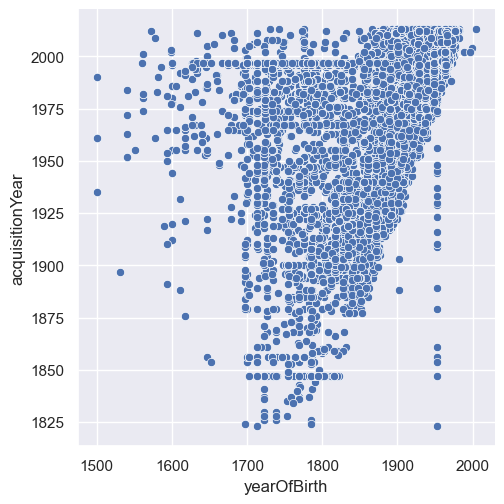

<Figure size 1600x640 with 0 Axes>

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
sns.set_theme()
sns.relplot(data=merged, x='yearOfBirth', y='acquisitionYear')
plt.figure(figsize=(20,8),dpi=80)
plt.show()

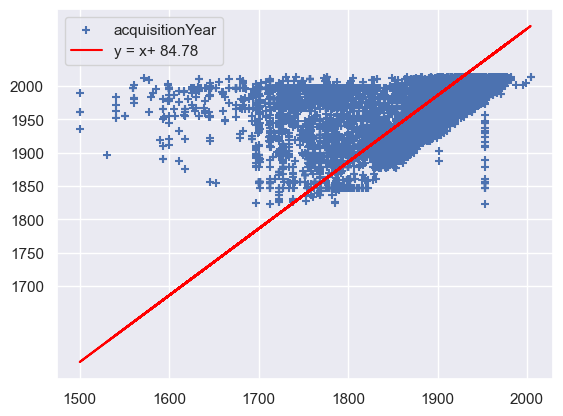

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
plt.scatter(data=merged, x='yearOfBirth', y='acquisitionYear', marker="+")
x_data = merged["yearOfBirth"]
ax = plt.gca()
to = np.arange(1700,2020,50)
plt.yticks(to)
plt.plot(x_data, x_data+86.14, color = 'red', label = 'y = x+ 84.78')
plt.legend()
plt.show()

With the development of technology, more art pieces were acquired around or after 2000. 

This could be for a number of reasons, such as the development of technology leading to an increase in the standard of authenticating paintings, making it easier to distinguish the real from the fake, and merchants becoming more willing to invest in art; or it could be that government promotion, the increase in art academies and people's aesthetic appreciation of art has led to more paintings being acquired; or it could be that the accelerated process of globalization and the development of the internet has made art more accessible, etc. The reasons behind this phenomenon of this museum are worth pondering.

From the image, it is not quite clear what the proportion of people above and below the red function line is; the artists above the function line appear to be many but loose, while those below the function line are smaller but more dense.Let's verify this.

In [78]:
elder_84 = result['ave_gap'][result['ave_gap'] > 84.78].count()
elder_84

943

In [79]:
younger_84 = result['ave_gap'][result['ave_gap'] < 84.78].count()
younger_84

2383

Based on the results we see that the majority of artists' works were acquired before the creators were 84 years old. According to 2022, the average human life expectancy is 78.2 years, so it seems that longevity, talent and perseverance are all three important if you want to become an artist.

It is interesting to note that the earlier an artist is born, the later their work seems to be acquired. Thankfully, the times have given contemporary artists more opportunities to be discovered for their talent.